# Milestone 1
Building on previous exercises, build an interactive application that asks the user a series of questions and then stores the user's answers for later analysis.

## Requirements
Your submission should include the following:
- A Chatbot that asks three users a series of at least three questions.
- Your chatbot should store the user's responses in a data structure, preferably a Pandas DataFrame, so that it can present a graphical analysis of the responses.
- Your chatbot should provide at least one visualization, such as a vertical bar chart, that provides a basic summary and analysis of the user input.

## Example Code

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Create a Basic Chatbot

In [2]:
positive = list(pd.read_csv("positive_words.txt", header=0).iloc[:,0].values)

In [3]:
len(positive)

2006

In [4]:
negative = list(pd.read_csv("negative_words.txt", header=0).iloc[:,0].values)

In [5]:
len(negative)

4782

### Initialize a DataFrame to Store User Input

### Run the Chatbot and Save Each User's Answers

In [6]:
import pandas as pd
import matplotlib.pyplot as plt



responses = []
questions = {"pos": ["Good to hear!What are you so happy about?", "What's something you're looking forward to?", "Do you have any plans for today?"],
             "neutral": ["What did you have for breakfast?", "Do you have any plans lately?","What are your hobbies?"],
             "neg": ["Sorry to hear that!What's bothering you?", "What's something that would make you feel better?", "What do you hope to accomplish today?"]}
escape = 'bye'


for i in range(3):
    response = {}
    name = input("Hi there! What's your name?")
    mood=input(f'Nice to meet you, {name} How are you today?') 
    print(f'I will ask a few questions. Press "{escape}" to quit.')
    response["name"] = name
    response["mood"] = mood

    positive_word_count = len(set(mood.split(" ")).intersection(set(positive)))
    negative_word_count = len(set(mood.split(" ")).intersection(set(negative)))

    if positive_word_count > negative_word_count:
        for j, question in enumerate(questions['pos']):
            answer = input(question)
            if answer == 'bye':
                break
            response[j] = answer
        responses.append(response)

    elif positive_word_count < negative_word_count:
        for j, question in enumerate(questions['neg']):
            answer = input(question)
            if answer == 'bye':
                break
            response[j] = answer
        responses.append(response)

    else:
        for j, question in enumerate(questions['neutral']):
            answer = input(question)
            if answer == 'bye':
                break
            response[j] = answer
        responses.append(response)
    
print("Thanks for the response.")


I will ask a few questions. Press "bye" to quit.
I will ask a few questions. Press "bye" to quit.
I will ask a few questions. Press "bye" to quit.
Thanks for the response.


### View Cumulative Data

In [7]:
df = pd.DataFrame(responses)

mood_counts = df["mood"].value_counts()

In [8]:
df

,name,mood,0,1,2
0,Elaine,good,my holiday,swimming,go to gix
1,Lily,good,my birthday,presents,nothing
2,Ben,bad,my homework,music,"maybe my homework, I am not sure"


### Analyze Data

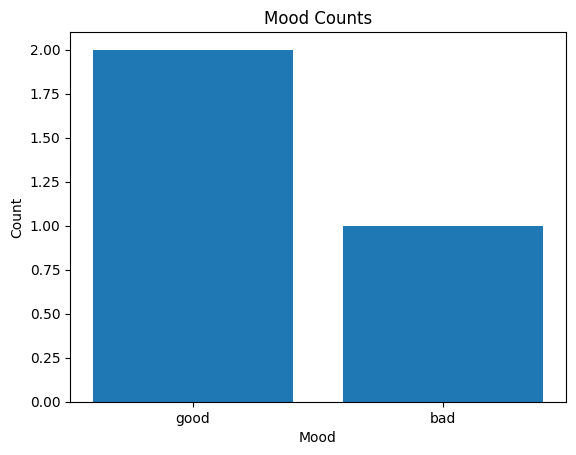

In [9]:

plt.bar(mood_counts.index, mood_counts.values)
plt.xlabel("Mood")
plt.ylabel("Count")
plt.title("Mood Counts")

plt.show()

## Be Creative!
Don't limit yourself to a simple Q&A. Feel free to explore things like the sentiment analysis that we did in Lab 1 by determining whether a user's input is positive or negative (remember the positive and negative word lists).